In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os

os.chdir('..')

In [2]:
from algen.trainer import Trainer

%load_ext autoreload
%autoreload 2

In [9]:
seed = 42
np.random.seed(seed)

num_cities = 100
dist = np.random.rand(num_cities, num_cities).round(2)
np.fill_diagonal(dist, float('inf'))
dist

array([[ inf, 0.95, 0.73, ..., 0.43, 0.03, 0.11],
       [0.03,  inf, 0.31, ..., 0.9 , 0.89, 0.78],
       [0.64, 0.08,  inf, ..., 0.22, 0.62, 0.09],
       ...,
       [0.78, 0.22, 0.72, ...,  inf, 0.41, 0.93],
       [0.78, 0.2 , 0.13, ..., 0.68,  inf, 0.04],
       [0.02, 0.37, 0.15, ..., 0.95, 0.4 ,  inf]])

In [11]:
from algen.selection import TournamentSelection

num_generations = 200
pop_size = 50
crossover_rate = 0.9
mutation_rate = 0.1

selection = TournamentSelection(tournament_size=5)

def fitness_tsp(chromosome):
    genotype = chromosome.genotype
    cur = genotype.copy()
    next = genotype[1:].tolist() + genotype[0:1].tolist()
    path_length = dist[cur, next]
    return - path_length.sum()

trainer = Trainer( 
    chromosome_type='permutation',
    chromosome_length=num_cities,
    fitness_function=fitness_tsp,
    pop_size=pop_size,
    selection=selection,
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    seed=seed
)

history = trainer.run(num_generations=num_generations, verbose=1)

Best generation : 199
Best fitness    : -13.110000000000003
Best chromosome : array([20, 61, 22, 79, 53, 69, 43, 89, 84, 41, 29, 96, 28, 51, 72, 73,  9,
       36, 39, 31, 27,  8, 21, 50, 42, 82, 17, 62, 11, 99, 16, 66, 38, 49,
        7, 54, 13,  2, 59, 81, 78, 87, 37, 45, 63, 46, 86, 93,  5, 56, 33,
       77, 88, 95, 71, 68, 24, 55, 75, 32, 23, 35,  3, 34, 60,  1, 52, 91,
       30, 18, 90, 80, 67, 70, 97, 47, 25, 58, 57, 74,  0, 85,  6, 64, 14,
       83, 26,  4, 76, 92, 12, 65, 48, 19, 40, 98, 44, 10, 94, 15])
Finished in 0:00:01 (avg 0.01s/generation)


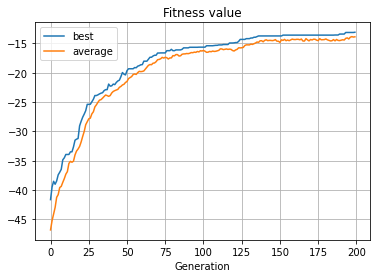

In [12]:
best = history.best_fitness_each_gen()
average = history.average_fitness_each_gen()
generation = history.generation

plt.plot(best, label='best')
plt.plot(average, label='average')

plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.title('Fitness value')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


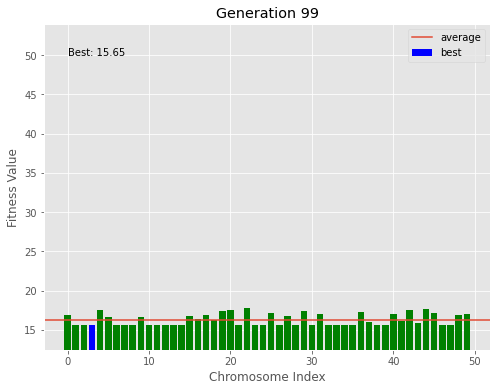

In [13]:
from matplotlib import animation
plt.style.use('ggplot')

fitness = history.fitness.copy()
fitness *= -1

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ylim = (0.95 * fitness.min(), 1.05 * fitness.max())

def animate(i):
    ax.cla()
    ax.set_ylim(ylim)
    ax.set_xlabel('Chromosome Index')
    ax.set_ylabel('Fitness Value')
    ax.set_title(f'Generation {history.generation[i]}')

    best = fitness[i].min()

    ax.axhline(y=fitness[i].mean(), label='average')
    ax.bar(x=range(trainer.pop_size), height=fitness[i], color='green')
    ax.bar(
        x=[fitness[i].argmin()],
        height=[best], color='blue', label='best'
    )
    ax.legend(loc='upper right')
    ax.annotate(f'Best: {best:.2f}', xy=(0, 50))

ani = animation.FuncAnimation(fig, animate, frames=100, interval=1000)
ani.save('animation.gif', fps=3)